In [12]:
# Packages einlesen
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [13]:
# Read the JSON data File and transform it into a DataFrame

with open('/Users/paulahofmann/Library/CloudStorage/OneDrive-Persönlich/Uni/2. Lernpools Master/Masterarbeit/Coding/Online-Review/filtered.json', 'r') as file:
    # Parse the JSON data into a Python object
    data = json.loads(file.read())


df = pd.DataFrame(data)
print(df.head(3))
   

   rating                          title  \
0     5.0  Easy to store and easy to use   
1     2.0                     Smells odd   
2     5.0             Very nice product.   

                                                text images        asin  \
0  Just threw away 2 ladies electric shavers. 1 b...     []  B0018A32XS   
1  It’s okay not the greatest and doesn’t have an...     []  B00EJDG7XI   
2          Sharp product. Easy to use and well made.     []  B0018A32XS   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B0018A32XS  AHZ6XMOLEWA67S3TX7IWEXXGWSOA  1467134907000             1   
1  B0BLGN9N39  AFSCQMP2EPYLGJN7OBTMEXCBE2OQ  1609008588813             0   
2  B0018A32XS  AHACLF2COQQE2V33ZFXQ7THZOJ2Q  1628855019775             0   

   verified_purchase  
0               True  
1               True  
2               True  


In [14]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')


In [15]:
# Count number of unique parent_asin in the DataFrame
unique_values = df['parent_asin'].unique()
print(unique_values)

['B0018A32XS' 'B0BLGN9N39']


In [16]:
# Split the data into two DataFrames based on the 'asin' column
data_utilitarian = df[df['parent_asin'] == 'B0018A32XS']
data_hedonic = df[df['parent_asin'] == 'B0BLGN9N39']

In [17]:
# Summarize overall rating for each product
print(data_utilitarian['rating'].describe())
print(data_hedonic['rating'].describe())

count    11388.000000
mean         4.004566
std          1.438159
min          1.000000
25%          3.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64
count    270.000000
mean       3.270370
std        1.582035
min        1.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


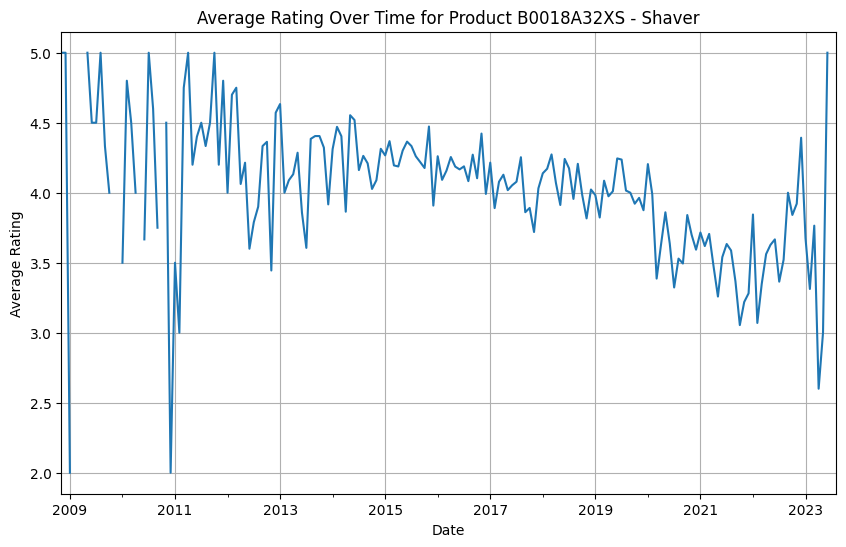

In [18]:
# Group the data by timestamp and calculate the average rating for each time period
average_rating_over_time = data_utilitarian.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

# Plot the average rating over time
plt.figure(figsize=(10, 6))
average_rating_over_time.plot()
plt.title('Average Rating Over Time for Product B0018A32XS - Shaver')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

## Text Preprocessing



In [19]:
import spacy

# Load the English language model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text using spaCy
def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Lemmatization and lowercasing
    processed_text = ' '.join([token.lemma_.lower() for token in doc])
    
    return processed_text

# Apply the preprocessing function to the "text" column
data_utilitarian['text_cleaned'] = data_utilitarian['text'].apply(preprocess_text)

# Apply the preprocessing function to the "title" column
data_utilitarian['title_cleaned'] = data_utilitarian['title'].apply(preprocess_text)

# Display the DataFrame with the processed text
print(data_utilitarian[['text', 'text_cleaned', 'title', 'title_cleaned']].head())



/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_30496/100385797.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['text_cleaned'] = data_utilitarian['text'].apply(preprocess_text)


                                                text  \
0  Just threw away 2 ladies electric shavers. 1 b...   
2          Sharp product. Easy to use and well made.   
3  I bought this one for my 13 year old granddaug...   
4  this is an excellent razor.  it caught and rem...   
5  Love this electric razor....it did my research...   

                                        text_cleaned  \
0  just throw away 2 lady electric shaver . 1 bat...   
2        sharp product . easy to use and well make .   
3  i buy this one for my 13 year old granddaughte...   
4  this be an excellent razor .   it catch and re...   
5  love this electric razor .... it do my researc...   

                                title                       title_cleaned  
0       Easy to store and easy to use       easy to store and easy to use  
2                  Very nice product.                 very nice product .  
3            Excellent electric razor            excellent electric razor  
4              very ni

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_30496/100385797.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['title_cleaned'] = data_utilitarian['title'].apply(preprocess_text)


In [20]:
# Adding another column, that filters out stop words and punctuation/symbols
import string

# Define a set of stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Function to preprocess text using spaCy
def preprocess_text_stops(text):
    # Process the text with spaCy
    doc = nlp(text)
    
    # Lemmatization, lowercasing, and removal of symbols, punctuation, and stop words
    processed_text = ' '.join([token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_punct])
    
    return processed_text

# Apply the preprocessing function to the "text" column
data_utilitarian['text_cleaned1'] = data_utilitarian['text'].apply(preprocess_text_stops)

# Apply the preprocessing function to the "title" column
data_utilitarian['title_cleaned1'] = data_utilitarian['title'].apply(preprocess_text_stops)

# Display the DataFrame with the processed text
print(data_utilitarian[['text', 'text_cleaned', 'title', 'title_cleaned']].head())


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_30496/2973632972.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['text_cleaned1'] = data_utilitarian['text'].apply(preprocess_text_stops)


                                                text  \
0  Just threw away 2 ladies electric shavers. 1 b...   
2          Sharp product. Easy to use and well made.   
3  I bought this one for my 13 year old granddaug...   
4  this is an excellent razor.  it caught and rem...   
5  Love this electric razor....it did my research...   

                                        text_cleaned  \
0  just throw away 2 lady electric shaver . 1 bat...   
2        sharp product . easy to use and well make .   
3  i buy this one for my 13 year old granddaughte...   
4  this be an excellent razor .   it catch and re...   
5  love this electric razor .... it do my researc...   

                                title                       title_cleaned  
0       Easy to store and easy to use       easy to store and easy to use  
2                  Very nice product.                 very nice product .  
3            Excellent electric razor            excellent electric razor  
4              very ni

/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_30496/2973632972.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['title_cleaned1'] = data_utilitarian['title'].apply(preprocess_text_stops)


## Using Sentiment Analysis for Review Text

In [21]:
import torch

# Check if MPS is available
print(torch.backends.mps.is_available())

# Check if PyTorch was built with MPS activated
print(torch.backends.mps.is_built())


True
True


In [22]:
#from transformers import pipeline

# Load the sentiment analysis pipeline
#sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Example text
#text = "I love this product! It's amazing."

# Perform sentiment analysis
#sentiment = sentiment_analysis(text)

# Output the sentiment prediction
#print(sentiment)


In [23]:
#from transformers import AutoTokenizer, AutoModelForSequenceClassification

#tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")

#model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")


In [24]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification


In [25]:
tokenizer = AutoTokenizer.from_pretrained("LiYuan/amazon-review-sentiment-analysis")
model = AutoModelForSequenceClassification.from_pretrained("LiYuan/amazon-review-sentiment-analysis")


In [26]:
def analyze_sentiment(text):
    # Tokenize the text
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    # Perform sentiment analysis
    outputs = model(**inputs)
    # Get the predicted label
    predicted_label = torch.argmax(outputs.logits)
    return predicted_label.item()  # Return the predicted label as an integer


In [27]:
data_utilitarian['text_sentiment'] = data_utilitarian['text_cleaned1'].apply(analyze_sentiment)
data_utilitarian['title_sentiment'] = data_utilitarian['title_cleaned1'].apply(analyze_sentiment)


/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_30496/317208670.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['text_sentiment'] = data_utilitarian['text_cleaned1'].apply(analyze_sentiment)
/var/folders/ss/4y6dgpw950348n7xdxy73vnm0000gn/T/ipykernel_30496/317208670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_utilitarian['title_sentiment'] = data_utilitarian['title_cleaned1'].apply(analyze_sentiment)


In [28]:
data_utilitarian.to_csv('data_utilitarian.csv', index=False)


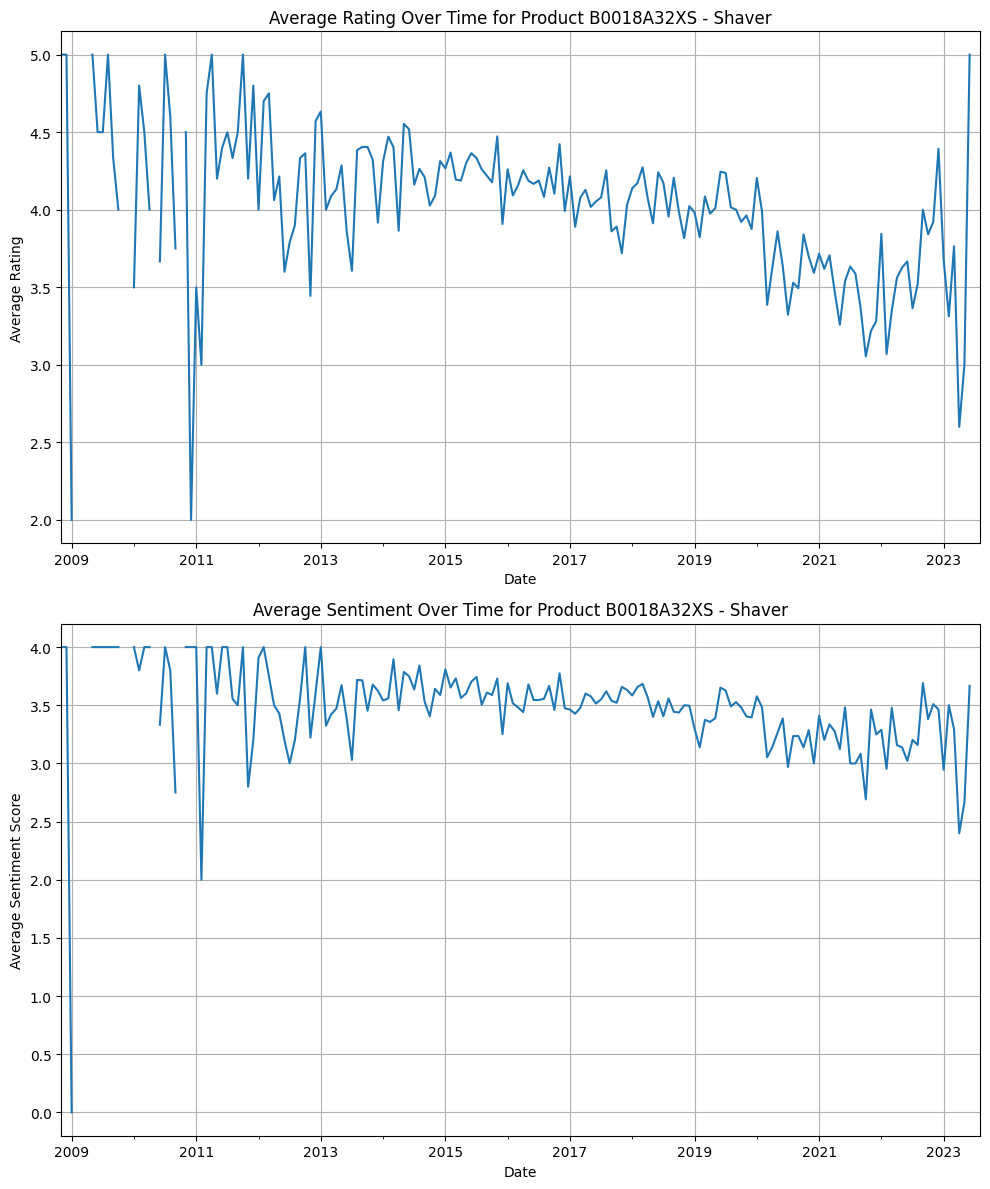

In [30]:
# Group the data by timestamp and calculate the average rating for each time period
average_rating_over_time = data_utilitarian.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Plot the average rating over time
average_rating_over_time.plot(ax=ax1)
ax1.set_title('Average Rating Over Time for Product B0018A32XS - Shaver')
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Rating')
ax1.grid(True)

# Plot the sentiment over time
# Assuming you have a column 'timestamp' in your DataFrame
sentiment_over_time = data_utilitarian.groupby(pd.Grouper(key='timestamp', freq='M'))['text_sentiment'].mean()
sentiment_over_time.plot(ax=ax2)
ax2.set_title('Average Sentiment Over Time for Product B0018A32XS - Shaver')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Sentiment Score')
ax2.grid(True)

plt.tight_layout()
plt.show()


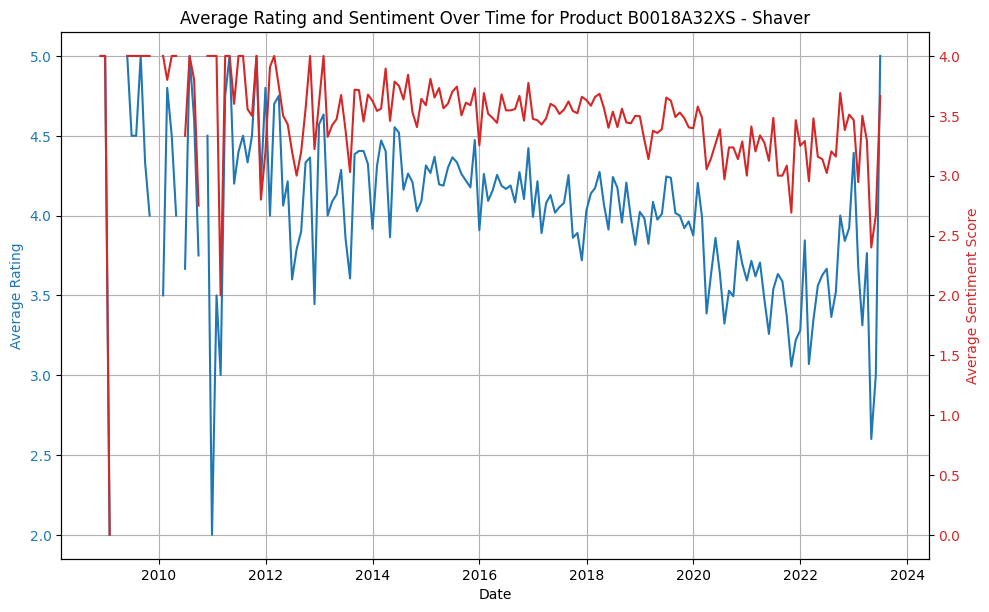

In [31]:
# Group the data by timestamp and calculate the average rating for each time period
average_rating_over_time = data_utilitarian.groupby(pd.Grouper(key='timestamp', freq='M'))['rating'].mean()

# Group the data by timestamp and calculate the average sentiment score for each time period
average_sentiment_over_time = data_utilitarian.groupby(pd.Grouper(key='timestamp', freq='M'))['text_sentiment'].mean()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting average rating over time
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Average Rating', color=color)
ax1.plot(average_rating_over_time.index, average_rating_over_time.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a secondary y-axis for sentiment score
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Sentiment Score', color=color)
ax2.plot(average_sentiment_over_time.index, average_sentiment_over_time.values, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Rating and Sentiment Over Time for Product B0018A32XS - Shaver')
plt.show()